# Fraud Detection
The problem at hand is to build a machine learning model that can predict online payment fraud for Blossom Bank. This is a binary classification problem where the target variable is 'isFraud', indicating whether a transaction is fraudulent or not. The objective is to build a model that can accurately identify fraudulent transactions and minimize false negatives while also reducing false positives.

The benefits of a successful solution would be immense for Blossom Bank, as it would help them to prevent financial losses due to fraudulent transactions, thereby increasing their profitability and customer trust.

In [1]:
# Load the neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the data
df = pd.read_csv(r'C:\\Users\\Mhizfair\\Desktop\\Quantum analytics\\Python\\Final Project\\Online Payment Fraud Detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Lets Get to know more about our data

In [3]:
df.info

<bound method DataFrame.info of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
df.shape

(1048575, 10)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [9]:
df.duplicated().sum()

0

### Observation: 
After getting to know our data here are some deductions
- The data is made up of 1,048,575 rows and 10 columns
- The data has no null value
- The data has no duplicate value
- The data has 3 different data types which are 1. int64 which is 2 columns, 2. Object which is 3 columns, 3. float which makes up 4 columns.

From the above deductions the dataset seems to be in good shape so it is safe to proceed so we can further understand our data by doing some Exploratory data analysis

## Exploratory Data Analysis
We are going to perform some explratory data analysis on our data to better understand what we are working with, the EDA will be divided into Univariate, Bivariate and Multivariate Analysis.

### Multivariate Analysis

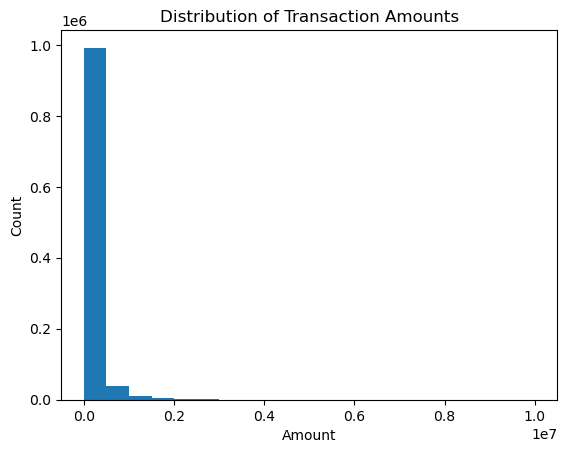

In [10]:
## Lets see the distribution of transaction amount by counts
plt.hist(df['amount'], bins=20)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()


In [11]:
## A closer look at the amount of recorded frauds will helps us know what we are working with
isFraud_counts = df['isFraud'].value_counts()
print(isFraud_counts)

0    1047433
1       1142
Name: isFraud, dtype: int64


<AxesSubplot:xlabel='isFraud', ylabel='count'>

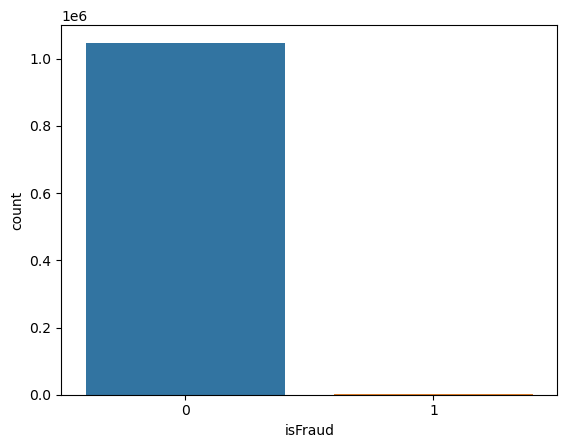

In [12]:
sns.countplot(x='isFraud', data=df)


In [13]:
## A closer look at the transaction Type
Trans_type = df['type'].value_counts()
print(Trans_type)

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

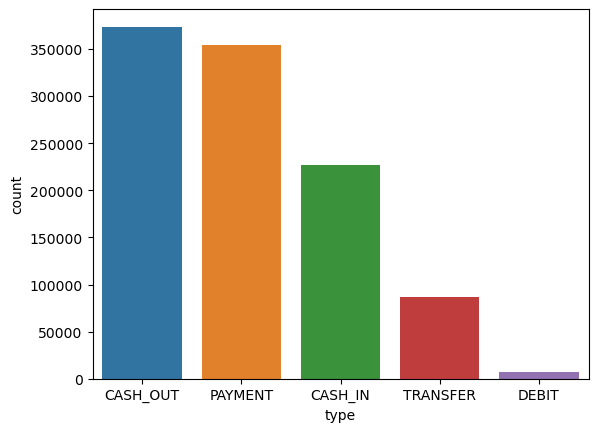

In [14]:
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)


### Observations:
From the univariate analysis conducted it is safe to say that
- Transactions with fewer amounts make 90% of the total transactions carried ou
- Of the over 1 million recorded transactions only about 1000 is recored as fraudulent which is about 0.1%
- Cash Out is the most favoured means of transactions by customers

Haven been able to deduce these lets see how the variables fair against each other in the Bivariate analysis

### Bi-Variate & Multivariate Analysis

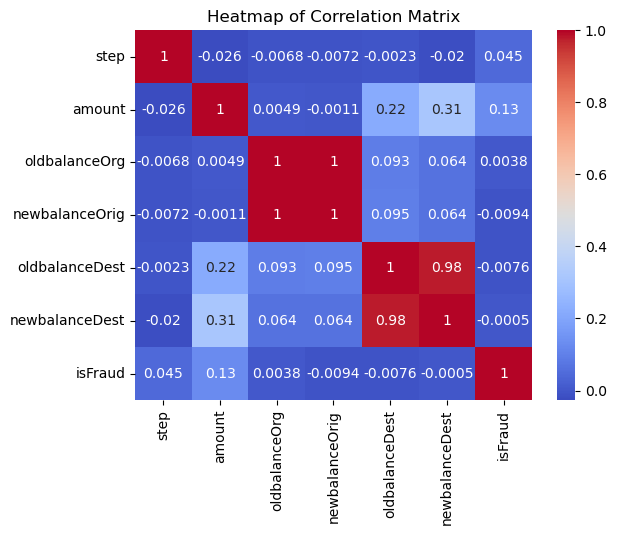

In [15]:
## Lets see how the variables correlate
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


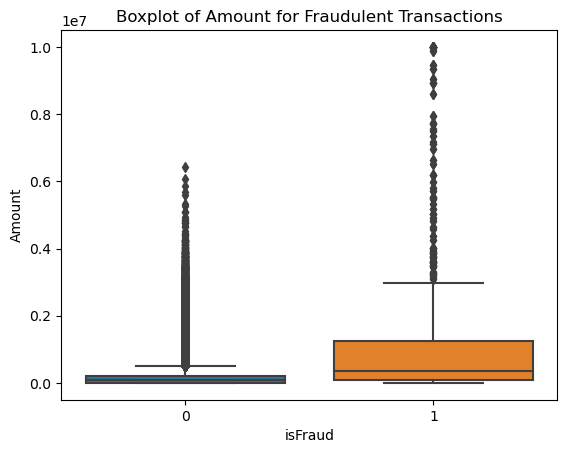

In [16]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.title('Boxplot of Amount for Fraudulent Transactions')
plt.show()


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

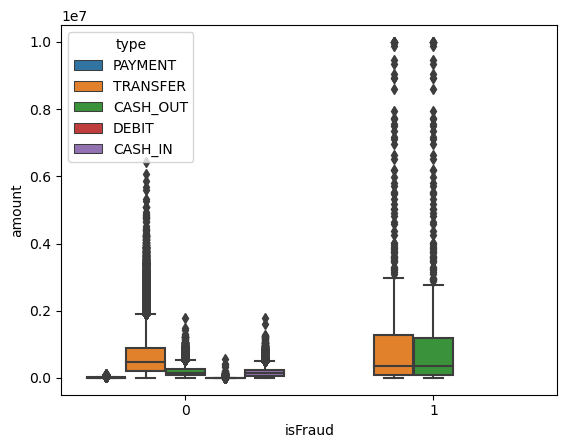

In [17]:
sns.boxplot(x='isFraud', y='amount', hue='type', data=df)

### Observation:
After conducting a multivarate analysis on the dataset we discovered that Cash Out and Transfer were the best type of transaction that was favored by scammers that perpetrate Fraud

## Feature Engineering

In [18]:
## Performing One hot encoding on the column type
encoded_df = pd.get_dummies(df, columns=['type'], prefix='type')
encoded_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


In [19]:
df= encoded_df
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [20]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [21]:
##Selecting the target
y= df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [22]:
## selecting features that is relevant to our machine learning
f_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X = df[f_columns]
X.head()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [23]:
## splitting our dataset into test and train in a 3:7 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42 )
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (734002, 10)
x_test: (314573, 10)
y_train: (734002,)
y_test: (314573,)


## Algorithms

### Decision Tree Classifier 
we are going to see how the decision tree classifier performs on our data

In [24]:
## Importing desicion tree
from sklearn.tree import DecisionTreeClassifier
Dc_model= DecisionTreeClassifier()
Dc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
## Lets see how the algorithm compairs to the first five instatnces from our dataset
Dc_pred= Dc_model.predict(x_test)
print(y_test.head().tolist())
print(Dc_pred[:5])

[0, 0, 0, 0, 0]
[0 0 0 0 0]


In [26]:
## Wed use accuracy score to test the performance of the algorithm
from sklearn.metrics import accuracy_score
print(accuracy_score(Dc_pred, y_test)*100)

99.94723005470908


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
Rf_model= RandomForestClassifier()
Rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
## Lets see how the algorithm compairs to the first five instatnces from our dataset
Rf_pred= Rf_model.predict(x_test)
print(y_test.head().tolist())
print(Rf_pred[:5])

[0, 0, 0, 0, 0]
[0 0 0 0 0]


In [29]:
## Wed use accuracy score to test the performance of the algorithm
print(accuracy_score(Rf_pred, y_test)*100)

99.96248883407031


## K-Neigbour Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
K_model= KNeighborsClassifier()
K_model.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
K_preds= K_model.predict(x_test)
print(accuracy_score(K_preds, y_test)*100)

C:\Users\Mhizfair\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


99.93515018771477


## Evaluating our Models

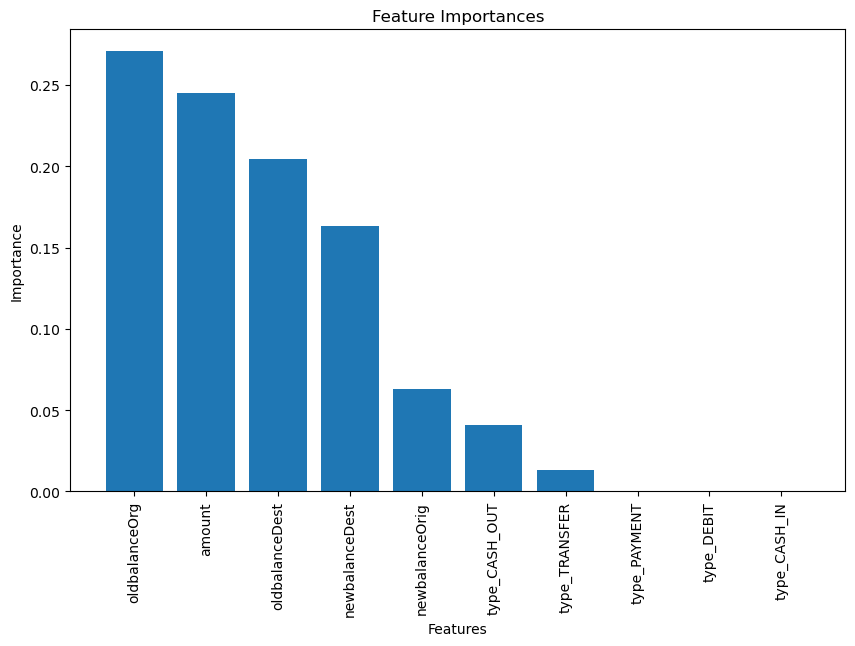

In [34]:
## feature Importance for DC Model

import matplotlib.pyplot as plt

# Get feature importances
importances = Dc_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

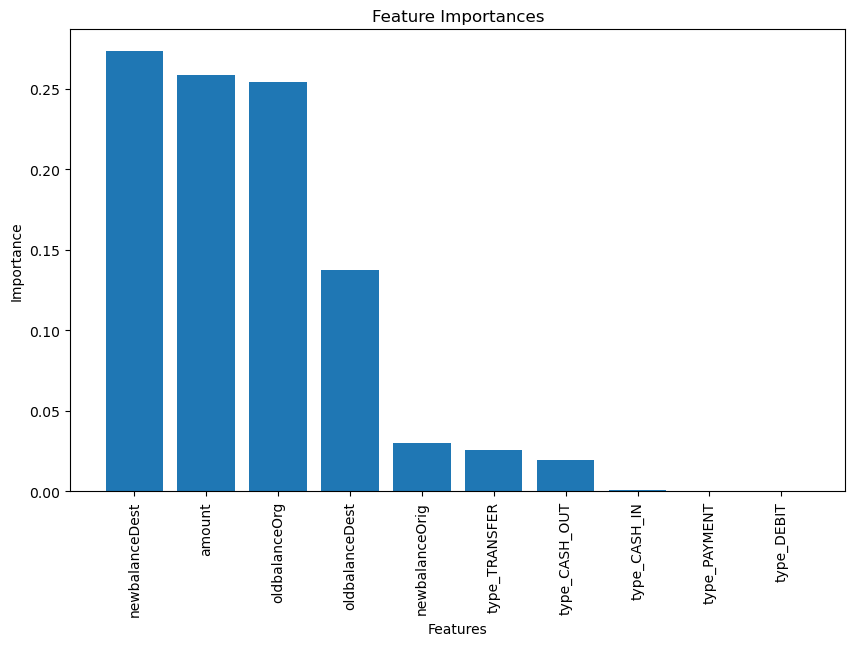

In [35]:
## feature Importance for RF Model

import matplotlib.pyplot as plt

# Get feature importances
importances = Rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Observation: 
after looking at the feature importance from two of our algorithms it was discovered that the relied heavily on the amount of transaction to carry out the model, while amount was not the most important feature for either it came second for both type debit and type CashIn was the least relied upon feature

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [43]:
# Decision Tree
dc_accuracy = accuracy_score(y_test, Dc_pred)
dc_precision = precision_score(y_test, Dc_pred)
dc_recall = recall_score(y_test, Dc_pred)
dc_f1 = f1_score(y_test, Dc_pred)
dc_roc_auc = roc_auc_score(y_test, Dc_pred)

# Random Forest
Rf_accuracy = accuracy_score(y_test, Rf_pred)
Rf_precision = precision_score(y_test, Rf_pred)
Rf_recall = recall_score(y_test, Rf_pred)
Rf_f1 = f1_score(y_test, Rf_pred)
Rf_roc_auc = roc_auc_score(y_test, Rf_pred)

# K-Nearest Neighbors
k_accuracy = accuracy_score(y_test, K_preds)
k_precision = precision_score(y_test, K_preds)
k_recall = recall_score(y_test, K_preds)
k_f1 = f1_score(y_test, K_preds)
k_roc_auc = roc_auc_score(y_test, K_preds)


In [44]:
print("Decision Tree:")
print("Accuracy:", dc_accuracy)
print("Precision:", dc_precision)
print("Recall:", dc_recall)
print("F1-Score:", dc_f1)
print("ROC-AUC:", dc_roc_auc)
print()

print("Random Forest:")
print("Accuracy:", Rf_accuracy)
print("Precision:", Rf_precision)
print("Recall:", Rf_recall)
print("F1-Score:", Rf_f1)
print("ROC-AUC:", Rf_roc_auc)
print()

print("K-Nearest Neighbors:")
print("Accuracy:", k_accuracy)
print("Precision:", k_precision)
print("Recall:", k_recall)
print("F1-Score:", k_f1)
print("ROC-AUC:", k_roc_auc)


Decision Tree:
Accuracy: 0.9994723005470908
Precision: 0.7621776504297995
Recall: 0.7621776504297995
F1-Score: 0.7621776504297995
ROC-AUC: 0.8809567538263362

Random Forest:
Accuracy: 0.9996248883407031
Precision: 0.9565217391304348
Recall: 0.6934097421203438
F1-Score: 0.8039867109634551
ROC-AUC: 0.8466873676231333

K-Nearest Neighbors:
Accuracy: 0.9993515018771477
Precision: 0.8138528138528138
Recall: 0.5386819484240688
F1-Score: 0.6482758620689655
ROC-AUC: 0.7692725516854292


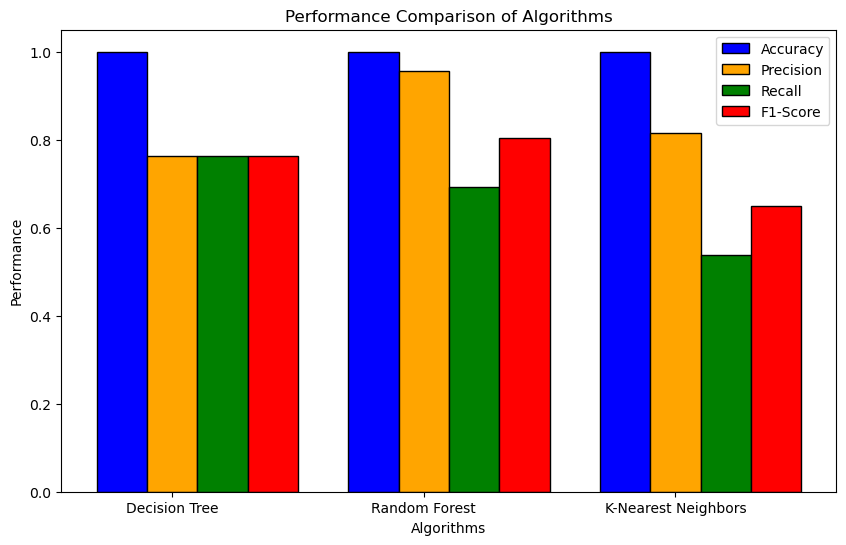

In [46]:
# Define the performance metrics for each algorithm
accuracy = [dc_accuracy, Rf_accuracy, k_accuracy]
precision = [dc_precision, Rf_precision, k_precision]
recall = [dc_recall, Rf_recall, k_recall]
f1_score = [dc_f1, Rf_f1, k_f1]
roc_auc = [dc_roc_auc, Rf_roc_auc, k_roc_auc]

# Define the algorithm names
algorithms = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, precision, color='orange', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, recall, color='green', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_score, color='red', width=bar_width, edgecolor='black', label='F1-Score')

# Add x-axis labels, y-axis label, and chart title
plt.xlabel('Algorithms')
plt.ylabel('Performance')
plt.title('Performance Comparison of Algorithms')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Observation:
The Random Forest algorithm outperformed the others in terms of accuracy, precision, recall, F1-score, and ROC-AUC

## Conclusion
The importance of false negatives and true positives depends on the specific context and objectives of the business in the context of fraud detection. Let's consider the implications of false negatives and true positives:

False Negatives:

False negatives occur when a fraudulent transaction is incorrectly classified as non-fraudulent. This means that the fraud goes undetected and no action is taken.
The potential impact of false negatives is that fraudulent activities may go unnoticed, leading to financial losses for the business and potential harm to customers.
If the business wants to prioritize minimizing financial losses due to fraud and maintaining customer trust, it should be more concerned about false negatives. Detecting and preventing fraudulent transactions is crucial in this case.
True Positives:

True positives occur when a fraudulent transaction is correctly classified as fraudulent. This means that the fraud is detected and appropriate actions can be taken, such as blocking the transaction or investigating further.
The impact of true positives is that fraud can be addressed promptly, potentially minimizing financial losses and protecting the business and customers.
If the business wants to prioritize swift action and minimizing the impact of fraudulent activities, it should be more concerned about true positives.
In fraud detection, striking a balance between false negatives and true positives is important. A business may want to minimize both false negatives and false positives (non-fraudulent transactions incorrectly classified as fraudulent) to achieve the best overall performance. The specific emphasis on false negatives or true positives depends on the business's risk tolerance, resources available for investigation, and the potential consequences of fraud in their specific industry or domain.